In [1]:
import os
import sys
import cv2
import numpy as np
import pandas as pd
from glob import glob
from PIL import Image
from tqdm.notebook import tqdm

import matplotlib.pyplot as plt
import seaborn as sns
import multiprocessing as mp

from face_detections import face_detect, gray_scale, cv_face_detect

/opt/ml/project/data_processing/face_detections.py:21: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if face is ():
2022-10-25 13:11:20.324496: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-10-25 13:11:20.478456: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/conda/lib/python3.8/site-packages/cv2/../../lib64:
2022-10-25 13:11:20.478477: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-10-25 13:11:20.512632: E tensorflow/stream_executor/cuda/cuda_bl

In [2]:
os.path.dirname(os.path.abspath('__file__'))

'/opt/ml/project/data_processing'

In [3]:
class CFG:
    data_dir = os.getcwd() + '/../input/data/train' # /opt/ml/project/DataProcessing/../input/data/train
    img_dir = f'{data_dir}/images'
    df_path = f'{data_dir}/train.csv'

In [4]:
num2class = ['incorrect_mask', 'mask1', 'mask2', 'mask3', 'mask4', 'mask5', 'normal']
class2num = {k:v for v, k in enumerate(num2class)}
print(class2num)

df = pd.read_csv(CFG.df_path)
df.head()

{'incorrect_mask': 0, 'mask1': 1, 'mask2': 2, 'mask3': 3, 'mask4': 4, 'mask5': 5, 'normal': 6}


,id,gender,race,age,path
0,000001,female,Asian,45,000001_female_Asian_45
1,000002,female,Asian,52,000002_female_Asian_52
2,000004,male,Asian,54,000004_male_Asian_54
3,000005,female,Asian,58,000005_female_Asian_58
4,000006,female,Asian,59,000006_female_Asian_59


/opt/ml/project/data_processing/../input/data/train/images/000001_female_Asian_45/incorrect_mask.jpg


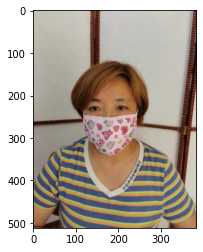

In [64]:
def image_path(idx, normal=6):
    return CFG.img_dir +'/' + df['path'][idx] + '/' + num2class[normal] + '.jpg'

print(image_path(0, 0))
image = cv2.imread(image_path(0, 5))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

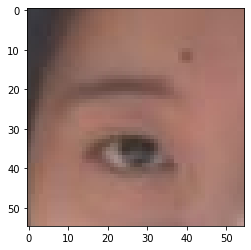

(55, 55, 3)


In [19]:
image = cv2.imread(image_path(1245, 5))

face_image = face_detect(image, gray_scale)
if face_image is None:
    face_image = cv_face_detect(image)
# face_image = cv_face_detect(image)
    
plt.imshow(face_image)
plt.show()
print(face_image.shape)

384 512


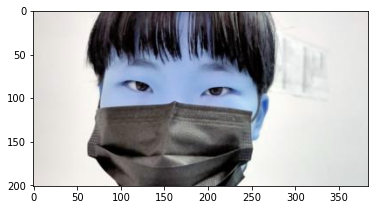

In [67]:
image = cv2.imread(image_path(1156, 5))
h, w, c = image.shape
print(w, h)
image = image[64:384][55:256]
plt.imshow(image)
plt.show()